**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4034 - Análisis de grandes volúmenes de datos (Gpo 10)**

Tecnológico de Monterrey

Dr. Nestor Velasco Bermeo

**Semana 4_5 **
4.3 Avance de proyecto 2: Sistema de Recomendación
---


*   NOMBRE: Luis Salomon Flores Ugalde
*   MATRÍCULA: A00817435
*   NOMBRE: Alejandro Guzmán Chávez
*   MATRÍCULA: A01795398
*   NOMBRE: Oscar Israel Lerma Franco
*   MATRÍCULA: A01380817

En esta entrega es necesario realizar un reporte donde se enlisten los siguientes aspectos:

*  Realiza la implementación de al menos un algoritmo de recomendación avanzados (por ejemplo, factorización matricial, enfoques basados en aprendizaje profundo). La evidencia se debe poner en el repositorio GitHub del equipo.

* Identifica y justifica las métricas de evaluación utilizadas para evaluar el desempeño de los sistemas de recomendación, con el proyecto elegido por equipo.


*  Resultados y análisis. Enlista la menos 3 recomendaciones donde se muestren los resultados obtenidos del punto 1 (implementación del algoritmo). La

In [966]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import json

In [967]:
import os

print("Current working directory:", os.getcwd())


Current working directory: /Users/lsfu/Desktop/MNA/BD


## Utility functions

In [968]:
import re
import json

def read_lines(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        while True:
            line = file.readline()
            if not line:
                break
            data.append(line)
    return data

def parse(g):
   for l in g:
        yield eval(l)

def parse_dataload_to_json_list(data):
    parsed = []
    line_count = 0
    for l in parse(data):
        line_count += 1
        r = json.dumps(l)
        loaded_r = json.loads(r)
        parsed.append(loaded_r)
    return parsed

## Lectura y transformación de los archivos en DataFrames

In [969]:
"""data_games = read_lines('steam_games.json')
json_games = parse_dataload_to_json_list(data_games)
with open('steam_games_p3.json', 'w', encoding='utf-8') as f:
    for item in json_games:
        json.dump(item, f, ensure_ascii=False)
        f.write('\n')"""

"data_games = read_lines('steam_games.json')\njson_games = parse_dataload_to_json_list(data_games)\nwith open('steam_games_p3.json', 'w', encoding='utf-8') as f:\n    for item in json_games:\n        json.dump(item, f, ensure_ascii=False)\n        f.write('\n')"

In [970]:
steam_games_df = pd.read_json('steam_games_p3.json', lines=True)

steam_games_df.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN,NaN


Repetimos para las reviews de usuarios australianos.

In [971]:
"""data_aus_rev = read_lines('australian_user_reviews.json')
json_aus_rev = parse_dataload_to_json_list(data_aus_rev)
with open('steam_aus_rev_p3.json', 'w', encoding='utf-8') as f:
    for item in json_aus_rev:
        json.dump(item, f, ensure_ascii=False)
        f.write('\n')"""

"data_aus_rev = read_lines('australian_user_reviews.json')\njson_aus_rev = parse_dataload_to_json_list(data_aus_rev)\nwith open('steam_aus_rev_p3.json', 'w', encoding='utf-8') as f:\n    for item in json_aus_rev:\n        json.dump(item, f, ensure_ascii=False)\n        f.write('\n')"

In [972]:
steam_aus_rev_df = pd.read_json('steam_aus_rev_p3.json', lines=True)

steam_aus_rev_df.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


La columna 'reviews' contiene un json de información. Este lo vamos a separar para poderlo explorar también.

In [973]:
working_df = steam_aus_rev_df.explode('reviews')
reviews_df = pd.json_normalize(working_df['reviews'])
reviews_df = reviews_df.join(working_df[['user_id', 'user_url']].reset_index(drop=True))

In [974]:
reviews_df.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637


## Análisis exploratorio

Exploramos los datos de ambos dataframes.

In [975]:
steam_games_df.shape

(32135, 16)

In [976]:
steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   discount_price  225 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  bool   
 12  id              32133 non-null  float64
 13  developer       28836 non-null  object 
 14  sentiment       24953 non-null  object 
 15  metascore       2677 non-null   object 
dtypes: bool(1), float64(2), object(13)
memory usage: 3.7+ MB


In [977]:
steam_games_df.isna().sum() / len(steam_games_df)

publisher         0.250568
genres            0.102163
app_name          0.000062
title             0.063793
url               0.000000
release_date      0.064322
tags              0.005072
discount_price    0.992998
reviews_url       0.000062
specs             0.020850
price             0.042850
early_access      0.000000
id                0.000062
developer         0.102661
sentiment         0.223495
metascore         0.916695
dtype: float64

Podemos observar columnas con bastantes datos nulos. Estos es mejor eliminarlos para evitar problemas con ellas.

In [978]:
steam_games_df.drop(columns=['metascore'],axis=1)

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140.0,Kotoshiro,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980.0,Secret Level SRL,Mostly Positive
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290.0,Poolians.com,Mostly Positive
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400.0,彼岸领域,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640.0,"Nikita ""Ghost_RUS""",NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530.0,Sacada,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660.0,Laush Dmitriy Sergeevich,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870.0,"xropi,stev3ns",1 user reviews


El resto de columnas que están nulas las vamos a imputar con valores predefinidos. Esto podría mejorar llenando la información, no es recomendable para este caso imputar con la moda ya que generaríamos contenido sesgado.

In [979]:
steam_games_df['publisher'].fillna('', inplace=True)
steam_games_df['genres'].fillna('[]', inplace=True) #Usamos una lista vacías ya que es el formato de la columna y permitirá separarla después
steam_games_df['tags'].fillna('[]', inplace=True) #Usamos una lista vacías ya que es el formato de la columna y permitirá separarla después

In [980]:
steam_games_df.isna().sum() / len(steam_games_df)

publisher         0.000000
genres            0.000000
app_name          0.000062
title             0.063793
url               0.000000
release_date      0.064322
tags              0.000000
discount_price    0.992998
reviews_url       0.000062
specs             0.020850
price             0.042850
early_access      0.000000
id                0.000062
developer         0.102661
sentiment         0.223495
metascore         0.916695
dtype: float64

Revisamos también el dataframe de los reviews.

In [981]:
reviews_df.shape

(59333, 9)

In [982]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59333 entries, 0 to 59332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  object
 6   review       59305 non-null  object
 7   user_id      59333 non-null  object
 8   user_url     59333 non-null  object
dtypes: object(9)
memory usage: 4.1+ MB


In [983]:
reviews_df.isna().sum() / len(reviews_df)

funny          0.000472
posted         0.000472
last_edited    0.000472
item_id        0.000472
helpful        0.000472
recommend      0.000472
review         0.000472
user_id        0.000000
user_url       0.000000
dtype: float64

## Preprocesamiento

In [984]:
reviews_df['recommend'] = reviews_df['recommend'].astype(bool)


Limpiamos el campo id

In [985]:
nan_rows_in_id = steam_games_df[steam_games_df['id'].isna()]
print("Rows with NaN values in the 'id' column of steam_games_df:")
nan_rows_in_id

Rows with NaN values in the 'id' column of steam_games_df:


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
74,,[],NaN,NaN,http://store.steampowered.com/,NaN,[],14.99,NaN,NaN,19.99,False,NaN,NaN,NaN,NaN
30961,"Warner Bros. Interactive Entertainment, Feral ...","[Action, Adventure]",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Open World, Batman, Adventure, Stealt...",NaN,NaN,"[Single-player, Steam Achievements, Steam Trad...",19.99,False,NaN,"Rocksteady Studios,Feral Interactive (Mac)",Overwhelmingly Positive,91


In [986]:
#steam_games_df = steam_games_df.dropna(subset=['id'])
steam_games_df = steam_games_df[steam_games_df['id'].notna()]
steam_games_df.reset_index(drop=True, inplace=True)


In [987]:
steam_games_df['id'] = steam_games_df['id'].astype(int)
#steam_games_df['id'] = steam_games_df['id'].astype(str).str.replace('.0', '', regex=False)
steam_games_df


,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,,[],Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32128,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN
32129,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN
32130,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN
32131,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN


In [988]:
steam_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32133 entries, 0 to 32132
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       32133 non-null  object 
 1   genres          32133 non-null  object 
 2   app_name        32132 non-null  object 
 3   title           30084 non-null  object 
 4   url             32133 non-null  object 
 5   release_date    30067 non-null  object 
 6   tags            32133 non-null  object 
 7   discount_price  224 non-null    float64
 8   reviews_url     32133 non-null  object 
 9   specs           31464 non-null  object 
 10  price           30756 non-null  object 
 11  early_access    32133 non-null  bool   
 12  id              32133 non-null  int64  
 13  developer       28835 non-null  object 
 14  sentiment       24952 non-null  object 
 15  metascore       2676 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(13)
memory usage: 3.7+ MB


In [989]:
#reviews_df = reviews_df.dropna(subset=['item_id'])
reviews_df = reviews_df[reviews_df['item_id'].notna()]
reviews_df.reset_index(drop=True, inplace=True)

In [990]:
reviews_df['item_id'] = reviews_df['item_id'].astype(int)

reviews_df

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id,user_url
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637,http://steamcommunity.com/id/js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637,http://steamcommunity.com/id/js41637
...,...,...,...,...,...,...,...,...,...
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244,http://steamcommunity.com/profiles/76561198312...
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley,http://steamcommunity.com/id/LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley,http://steamcommunity.com/id/LydiaMorley


Dado a que hay reviews de juegos que no se tienen, se pueden eliminar esos reviews por el momento.

In [991]:
reviews_df = reviews_df[reviews_df['item_id'].isin(steam_games_df['id'])]

Podemos eliminar la columna user_url ya que ya tenemos los ids de usuarios.
También las columnas funny, posted, last_edited, helpful, ya que no aportan información para la simulitud entre juegos.

In [992]:
reviews_df.drop(columns=['funny', 'posted', 'last_edited', 'helpful', 'user_url'],axis=1, inplace=True)

/var/folders/5n/lp3_lp252c17c644s2777gmr0000gn/T/ipykernel_23237/1455476800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_df.drop(columns=['funny', 'posted', 'last_edited', 'helpful', 'user_url'],axis=1, inplace=True)


Contamos los generos y los tags, ya que son las características que ayudarán a encontrar similitudes

In [993]:
from collections import Counter

contador_generos = Counter(g for genres in steam_games_df['genres'] for g in genres)
print(f"Existen {len(contador_generos)} tipos de generos.")
contador_generos

Existen 24 tipos de generos.


Counter({'Indie': 15858,
         'Action': 11320,
         'Casual': 8282,
         'Adventure': 8242,
         'Strategy': 6957,
         'Simulation': 6699,
         'RPG': 5479,
         '[': 3282,
         ']': 3282,
         'Free to Play': 2031,
         'Early Access': 1462,
         'Sports': 1257,
         'Massively Multiplayer': 1108,
         'Racing': 1083,
         'Design &amp; Illustration': 460,
         'Utilities': 340,
         'Web Publishing': 268,
         'Animation &amp; Modeling': 183,
         'Education': 125,
         'Video Production': 116,
         'Software Training': 105,
         'Audio Production': 93,
         'Photo Editing': 77,
         'Accounting': 7})

In [994]:
contador_tags = Counter(t for tags in steam_games_df['tags'] for t in tags)
print(f"Existen {len(contador_tags)} tipos de tags.")

Existen 341 tipos de tags.


/var/folders/5n/lp3_lp252c17c644s2777gmr0000gn/T/ipykernel_23237/2966691584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres', y='count', data=genres_counts_df, palette='rocket')


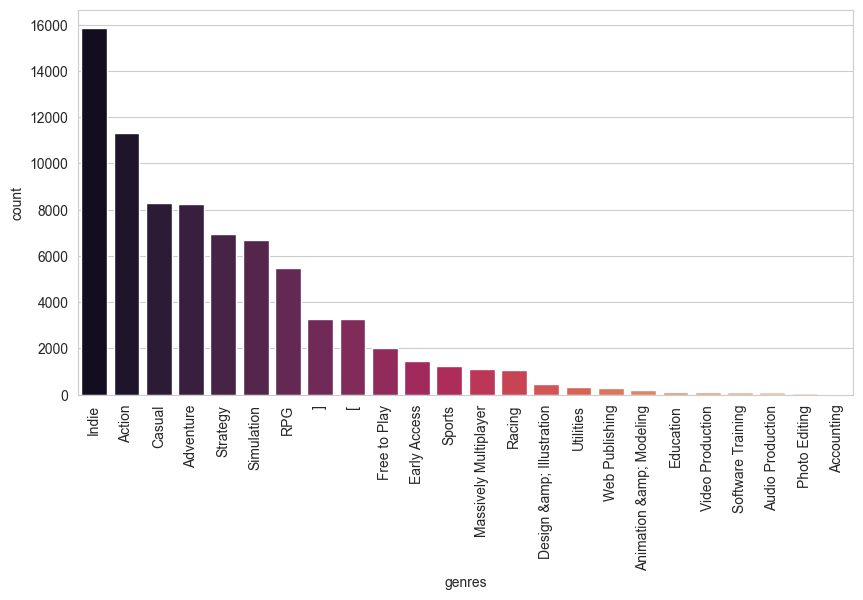

In [995]:
genres_counts_df = pd.DataFrame([contador_generos]).T.reset_index()
genres_counts_df.columns = ['genres', 'count']
genres_counts_df = genres_counts_df.sort_values(by='count', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='genres', y='count', data=genres_counts_df, palette='rocket')
plt.xticks(rotation=90)
plt.show()

## Transformado de datos

Para construir un sistema de recomendacion con filtrado basado en contenido necesitamos preparar nuestro dataset de forma tal que las filas representen los juegos de steam y las columnas las caracteristicas (generos y tags)


In [996]:
genres = list(contador_generos.keys())

for g in genres:
    steam_games_df[g] = steam_games_df['genres'].transform(lambda x: int(g in x))

In [997]:
steam_games_df[genres].head()

,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,Sports,Adventure,[,...,Animation &amp; Modeling,Video Production,Utilities,Web Publishing,Education,Software Training,Design &amp; Illustration,Audio Production,Photo Editing,Accounting
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Para codificar los tags usaremos otro algoritmo para mejorar el rendimiento ya que son muchos tags

In [998]:
tags = list(contador_tags.keys())

tags_matrix = {tag: steam_games_df['tags'].apply(lambda x: int(tag in x)) for tag in contador_tags.keys()}
tags_df = pd.DataFrame(tags_matrix)
steam_features = pd.concat([steam_games_df[genres], tags_df], axis=1)

steam_features.head()

,Action,Casual,Indie,Simulation,Strategy,Free to Play,RPG,Sports,Adventure,[,...,Foreign,Feature Film,Hardware,Steam Machine,Philisophical,Mystery Dungeon,Wrestling,360 Video,Faith,Bikes
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Algoritmo de recomendación

Para construir este sistema de recomendacion item-item utilizaremos una metrica llamada similitud coseno `cosine similarity`.

La similitud Coseno se basa en el coseno del angulo entre dos vectores (c.e., $A$ y $B$). Entre mas pequeño es el angulo, mayor es la similitud entre los vectores, y se calcula de la siguiente forma:

$$\cos(\theta) = \frac{A\cdot B}{||A|| ||B||}$$

En este ejercicio, utilizaremos la funcion de scikit-learn de `cosine_similarity` para generar la matriz de similitud de tipo $(n_{\text{juego}}, n_{\text{juego}})$. Esta matriz nos permitira extraer juegos que sean parecidos al videojuego de interes.

In [999]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(steam_features, steam_features)
print(f"Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: {cosine_sim.shape}")

Las dimensiones de similaridad coseno de las caracteristicas de nuestra matriz de similitud son: (32133, 32133)


Ahora generamos un método que devuelva las recomendaciones para un usuario específico

In [1000]:
game_idx = dict(zip(steam_games_df['id'], list(steam_games_df.index)))


In [1001]:
def encuentra_juego(game_id):
    title = steam_games_df[steam_games_df['id'] == game_id]['title'].iloc[0]
    return title

In [1002]:
def obtener_recomendaciones_basadas_contenido(game_id, numero_recomendaciones=10):
    title = encuentra_juego(game_id)
    idx = game_idx[game_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(numero_recomendaciones+1)]
    similar_games = [i[0] for i in sim_scores]
    print(f"Porque te gustó {title} te pueden gustar:")
    print(steam_games_df['title'].iloc[similar_games])

Ejemplo de una recomendación basada en contenido

In [1003]:
encuentra_juego(773640)

'Colony On Mars'

In [1004]:
obtener_recomendaciones_basadas_contenido(773640, 5)

Porque te gustó Colony On Mars te pueden gustar:
746           Fate of the World: Migration
749         Fate of the World: Extras Pack
2423    Wildlife Park 2 - Domestic Animals
3433        World of Cinema - Movie Tycoon
3680              Age of Castles: Warlords
Name: title, dtype: object


Con este algoritmo, podríamos obtener los reviews y recomendar juegos similares a los usuarios.

In [1005]:
reviews_df[:5]

,item_id,recommend,review,user_id
0,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,22200,True,It's unique and worth a playthrough.,76561197970982479
4,227300,True,For a simple (it's actually not all that simpl...,js41637
5,239030,True,Very fun little game to play when your bored o...,js41637
6,248820,True,A suitably punishing roguelike platformer. Wi...,evcentric


## 5 Recomendaciones

In [1006]:
for index,row in reviews_df.head().iterrows():
  print(f'\nRecomendaciones para el usuario: {row["user_id"]}')
  obtener_recomendaciones_basadas_contenido(row['item_id'],5)


Recomendaciones para el usuario: 76561197970982479
Porque te gustó Killing Floor te pueden gustar:
7987                                       Killing Floor 2
31527                                        Left 4 Dead 2
31753                           Call of Duty: World at War
31752                                          Left 4 Dead
1380     Resident Evil Revelations / Biohazard Revelations
Name: title, dtype: object

Recomendaciones para el usuario: 76561197970982479
Porque te gustó Zeno Clash te pueden gustar:
30194    Zeno Clash 2
25058      Orc Slayer
26728         Despair
6581          WARZONE
1850       CONSORTIUM
Name: title, dtype: object

Recomendaciones para el usuario: js41637
Porque te gustó Euro Truck Simulator 2 te pueden gustar:
30303                    Euro Truck Simulator
24194                American Truck Simulator
26714    Euro Truck Simulator 2 - Scandinavia
14744                               Real Farm
5844                                   Jalopy
Name: title, dt

## Metricas

In [1025]:
def get_recom_content_eval(game_id, recom=5):
    #title = encuentra_juego(game_id)
    idx = game_idx[game_id]
    sim_scores = cosine_sim[idx]
    recom_eval = pd.DataFrame({'index': steam_games_df.index,'similarity': sim_scores})
    #similarity_df = pd.DataFrame(list(enumerate(cosine_sim[idx])), columns=['index', 'similarity'])
    
    recom_eval = recom_eval.nlargest(recom,'similarity')
    recom_eval['game_id'] = recom_eval['index'].map(steam_games_df['id'])

    return recom_eval


def get_recom_content_user(game_id, numero_recom=5):
    full_recom_df = get_recom_content_eval(game_id, numero_recom + 1)
    if game_id in full_recom_df['game_id'].values:
        full_recom_df = full_recom_df[full_recom_df['game_id'] != game_id]
    
    return full_recom_df.head(numero_recom)


In [1012]:
def gen_recom_ground_truth(numero_recom):
    recommendations = {}
    ground_truth = {}

    for user_id in reviews_df['user_id'].unique():
        user_reviews = reviews_df[reviews_df['user_id'] == user_id]
        ground_truth[user_id] = user_reviews[user_reviews['recommend'] == True]['item_id'].tolist()

        user_recommendations = set()
        for game_id in user_reviews['item_id']:
            recommendations_for_game = get_recom_content_eval(game_id, numero_recom)
            if not recommendations_for_game.empty:
                user_recommendations.update(recommendations_for_game['game_id'].tolist())

        recommendations[user_id] = list(user_recommendations)[:numero_recom]

    return recommendations, ground_truth

In [1013]:
recommendations_dict, ground_truth_dict = gen_recom_ground_truth( numero_recom=5)

recommendations = [recommendations_dict[user] for user in recommendations_dict]
ground_truth = [ground_truth_dict[user] for user in ground_truth_dict]

In [1021]:
import recmetrics

# Calculate precision at K
precision = recmetrics.recommender_precision(recommendations, ground_truth)
print(f"Average Precision@K: {precision}")

# Calculate recall at K
#recall = recmetrics.recommender_recall(recommendations, ground_truth)
#print(f"Average Recall@K: {recall}")

mark = recmetrics.mark(ground_truth, recommendations, k=5)
print(f"Mean Average Precision at K (MAP@K): {mark}")

Average Precision@K: 0.17699343724364233
Mean Average Precision at K (MAP@K): 0.3060516970335213


In [1024]:
def precision_at_k(actual, predicted, k=10):
    if not actual:
        return 0.0
    
    predicted = predicted[:k]
    relevant = len(set(predicted) & set(actual))
    return relevant / k

def recall_at_k(actual, predicted, k=10):
    if not actual:
        return 0.0
    
    predicted = predicted[:k]
    relevant = len(set(predicted) & set(actual))
    return relevant / len(actual)

def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])

def ndcg_at_k(actual, predicted, k=10):
    if not actual:
        return 0.0
    
    predicted = predicted[:k]
    idcg = sum([1.0 / np.log2(i + 2) for i in range(len(actual))])
    dcg = sum([1.0 / np.log2(i + 2) for i, p in enumerate(predicted) if p in actual])
    return dcg / idcg

def mrr_at_k(actual, predicted, k=10):
    if not actual:
        return 0.0
    
    predicted = predicted[:k]
    for i, p in enumerate(predicted):
        if p in actual:
            return 1.0 / (i + 1.0)
    return 0.0

def evaluate_recommendations(ground_truth, recommendations, k=5):
    metrics = {
        'Precision@K': np.mean([precision_at_k(a, p, k) for a, p in zip(ground_truth, recommendations)]),
        'Recall@K': np.mean([recall_at_k(a, p, k) for a, p in zip(ground_truth, recommendations)]),
        'MAP@K': mapk(ground_truth, recommendations, k),
        'NDCG@K': np.mean([ndcg_at_k(a, p, k) for a, p in zip(ground_truth, recommendations)]),
        'MRR@K': np.mean([mrr_at_k(a, p, k) for a, p in zip(ground_truth, recommendations)])
    }
    return metrics

metrics = evaluate_recommendations(ground_truth, recommendations, k=5)
metrics

{'Precision@K': 0.17696472518457754,
 'Recall@K': 0.6471694450955116,
 'MAP@K': 0.3076029304530125,
 'NDCG@K': 0.4110959049914195,
 'MRR@K': 0.38881460213289576}

## Bibliografía

1. Marabelli, M; Saunders, C; y Wiener, M. (2020). Big-data business models: A critical literature review and multiperspective research framework. 35(1), 66-91.  https://journals.sagepub.com/doi/reader/10.1177/0268396219896811.
2. Kang W., McAuley J. (ICDM, 2018) Self-attentive sequential recommendation. UC San Diego pdf